# Sentiment Analysis
Sentiment analysis, also known as opinion mining, is a technique used in natural language
processing to identify and extract sentiments or opinions expressed in text data. It involves
analyzing textual data such as social media posts, product reviews, customer feedback, news
articles, or any other form of text to classify the sentiment expressed in the text. The sentiment can be classified in different categories, depending on the dataset at hand. The datasets we will be using have 2 to 4 sentiment categories: "positive", "negative", "neutral" and "mixed".


In this notebook we fine-tune BERT for sentiment analysis on each of the dataset that we have selected for this task. In the following sections we show how to load the datasets, preprocess them for sentiment analysis, train the BERT model and evaluate it on each dataset.

## Import necessary libaries

In [ ]:
!pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=464337e5541dc714beefb0962ee74ab0092daad730b1dfb9892fc290f141426b
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 38.0 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import get_linear_schedule_with_warmup
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import AdamW
from transformers import AutoTokenizer
import torch
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import pandas as pd
import re
import string
import operator
import numpy as np
import random
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.util import ngrams
import itertools
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import Dataset
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from transformers import Trainer
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from langdetect import detect
import spacy
import stanza

In [ ]:
# Download necessary NLTK data for preprocessing
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stanza.download("bg")
stanza.download("it")
stanza.download("ru")
stanza.download("zh")
stanza.download("nl")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: bg (Bulgarian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/bg/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: it (Italian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/it/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ru (Russian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ru/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:"zh" is an alias for "zh-hans"
INFO:stanza:Downloading default packages for language: zh-hans (Simplified_Chinese) ...


INFO:stanza:Downloaded file to /root/stanza_resources/zh-hans/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: nl (Dutch) ...


INFO:stanza:Downloaded file to /root/stanza_resources/nl/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the datasets

The following function is used to drop the entries of a dataset characterized by a nan value under the column "translated_text", which may occur sometimes when the translation was not successful.

In [ ]:
def remove_failed_translations(df_train, df_val, df_test):
    # Train
    rows_train = df_train.shape[0]
    df_train = df_train.dropna(subset=["translated_text"])
    print("Nan values found in train set: ", rows_train - df_train.shape[0])

    # Validation
    rows_val = df_val.shape[0]
    df_val = df_val.dropna(subset=["translated_text"])
    print("Nan values found in validation set: ", rows_val - df_val.shape[0])

    # Test
    rows_test = df_test.shape[0]
    df_test = df_test.dropna(subset=["translated_text"])
    print("Nan values found in test set: ", rows_test - df_test.shape[0])

    return df_train, df_val, df_test

In [ ]:
def load_dataset_splits(train_path, val_path, test_path):
    train = pd.read_csv(train_path)
    val = pd.read_csv(val_path)
    test = pd.read_csv(test_path)
    return train, val, test

In [ ]:
def drop_columns(train, val, test, cols, label_col):
    if cols != None:
        train = train.drop(columns=cols)
        val = val.drop(columns=cols)
        test = test.drop(columns=cols)

    train["labels"] = train[label_col]
    val["labels"] = val[label_col]
    test["labels"] = test[label_col]

    train = train.drop(columns=[label_col])
    val = val.drop(columns=[label_col])
    test = test.drop(columns=[label_col])

    return train, val, test

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Preprocessing
Text preprocessing is a crucial step in Natural Language Processing that involves cleaning and transforming raw text data into a format suitable for analysis and machine learning models. This process is vital for enhancing the performance and accuracy of NLP tasks

Durinng SLR we have identified the preprocessing techniques that we will apply for our experiments:
- lowercasing;
- removing URLs, special characters and HTML tags;
- removing non-ASCII characters;
- removing extra white space;
- removing repeated letters;
- removing extra punctuation;
- tokenization;
- removing stopwords;
- handling missing values;
- lemmatization;




### Handle Class Imbalance

1. **Class Weighting**: Assign higher weights to the minority classes so that the model pays more attention to them.

In [ ]:
# Compute class weights
def get_class_weights(train_labels, classes, device):
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=classes,
        y=train_labels
    )
    return torch.tensor(class_weights, dtype=torch.float).to(device)

def compute_class_weights(train_df, classes, device):
    # Get weights for loss function
    train_labels = train_df['labels'].values
    class_weights = get_class_weights(train_labels, classes, device)

    # Define weighted loss function
    loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

    return loss_fn

### Data Cleaning (English)

In [ ]:
# ENGLISH
class TextPreprocessor:
    def __init__(self, remove_stopwords=True, apply_lemmatization=True):
        self.remove_stopwords = remove_stopwords
        self.apply_lemmatization = apply_lemmatization
        self.stop_words = set(stopwords.words("english"))
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Preprocess a single text instance."""
        if pd.isna(text):
            return ""  # Handle missing values

        text = text.lower()  # Lowercase all text

        text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags

        text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs

        #text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Remove usernames

        text = re.sub(r"[^\x00-\x7F]+", "", text)  # Remove non-ASCII characters

        text = re.sub(r"([a-z])\1{2,}", r"\1", text)  # Reduce repeated letters (e.g., "gooood" → "good")

        text = re.sub(r"[^\w\s]", " ", text)  # Remove excessive punctuation

        text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace

        tokens = word_tokenize(text)  # Tokenization

        if self.remove_stopwords:
            tokens = [word for word in tokens if word not in self.stop_words]

        if self.apply_lemmatization:
            tokens = [self.lemmatizer.lemmatize(word) for word in tokens]

        return " ".join(tokens)  # Reconstruct cleaned text

    def preprocess_dataframe(self, df, text_col):
        """Apply preprocessing to an entire dataset."""
        df[text_col] = df[text_col].astype(str).apply(self.clean_text)
        return df

### Tokenization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Now use the Hugging Face tokenizer for the final tokenization
def tokenize_texts(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors="pt")

def preprocess_dataset(train, val, test):
    train = TextPreprocessor().preprocess_dataframe(train, 'translated_text')
    val = TextPreprocessor().preprocess_dataframe(val, 'translated_text')
    test = TextPreprocessor().preprocess_dataframe(test, 'translated_text')
    return train, val, test


def tokenization(train, val, test, labelCol):
    # Ensure 'translated_text' column is converted to a list of strings
    train_texts = train['translated_text'].astype(str).tolist()  # Convert to list of strings
    val_texts = val['translated_text'].astype(str).tolist()      # Convert to list of strings
    test_texts = test['translated_text'].astype(str).tolist()    # Convert to list of strings

    # Tokenize the preprocessed data
    train_encodings = tokenize_texts(train_texts)
    val_encodings = tokenize_texts(val_texts)
    test_encodings = tokenize_texts(test_texts)

    # Convert labels to the format expected by the model
    train_encodings[labelCol] = torch.tensor(pd.Series(train[labelCol]).values)
    val_encodings[labelCol] = torch.tensor(pd.Series(val[labelCol]).values)
    test_encodings[labelCol] = torch.tensor(pd.Series(test[labelCol]).values)

    return train_encodings, val_encodings, test_encodings


### Prepare data for training

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

## Train the model

In [ ]:
def load_model(df):
    num_labels = len(set(df['labels']))
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
    return model.to(device)

In [ ]:
class CustomTrainer(Trainer):
    def __init__(self, *args, loss_fn=None, **kwargs):
      super().__init__(*args, **kwargs)
      self.loss_fn = loss_fn

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")  # Get the true labels
        outputs = model(**inputs)  # Get model outputs
        logits = outputs.get("logits")  # Get the logits (raw predictions)

        # Compute the weighted loss
        loss = self.loss_fn(logits, labels)

        # Return loss, and optionally, the outputs (for debugging/metrics)
        return (loss, outputs) if return_outputs else loss

In [ ]:
class model_training:
    def __init__(self, train_dataset=None, val_dataset=None, tokenizer=None, model=None, loss_fn=None):
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.tokenizer = tokenizer
        self.model = model
        self.loss_fn = loss_fn

    @staticmethod
    def compute_metrics(p):
        preds = p.predictions.argmax(-1)  # Get predicted labels
        labels = p.label_ids  # True labels

        # Calculate accuracy
        accuracy = accuracy_score(labels, preds)

        # Calculate precision, recall, and F1 score
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def main(self):
        training_args = TrainingArguments(
            output_dir="/content/drive/MyDrive/Leiden Uni/Thesis/checkpoints",
            evaluation_strategy="steps",
            eval_steps=500,
            save_strategy="steps",
            save_steps=500,
            save_total_limit=3,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            remove_unused_columns=False,
            load_best_model_at_end=True,
            #logging_dir="./logs",
            #logging_steps=100,
            report_to="none"  # Disables wandb logging
        )

        # Look for the latest checkpoint
        checkpoint_dir = training_args.output_dir
        last_checkpoint = None

        if os.path.isdir(checkpoint_dir):
            checkpoints = [d for d in os.listdir(checkpoint_dir) if d.startswith("checkpoint-")]
            if checkpoints:
                last_checkpoint = os.path.join(checkpoint_dir, sorted(checkpoints, key=lambda x: int(x.split('-')[-1]))[-1])
        if last_checkpoint:
            print(f"Resuming training from checkpoint: {last_checkpoint}")
        else:
            print("No checkpoint found, starting from scratch.")

        if self.loss_fn != None:
            trainer = CustomTrainer(
                model=self.model,
                args=training_args,
                train_dataset=self.train_dataset,
                eval_dataset=self.val_dataset,
                tokenizer=self.tokenizer,
                compute_metrics=self.compute_metrics,
                loss_fn=self.loss_fn
            )
        else:
            trainer = Trainer(
              model=self.model,
              args=training_args,
              train_dataset=self.train_dataset,
              eval_dataset=self.val_dataset,
              tokenizer=self.tokenizer,
              compute_metrics=self.compute_metrics
            )

        return trainer, last_checkpoint

## Results

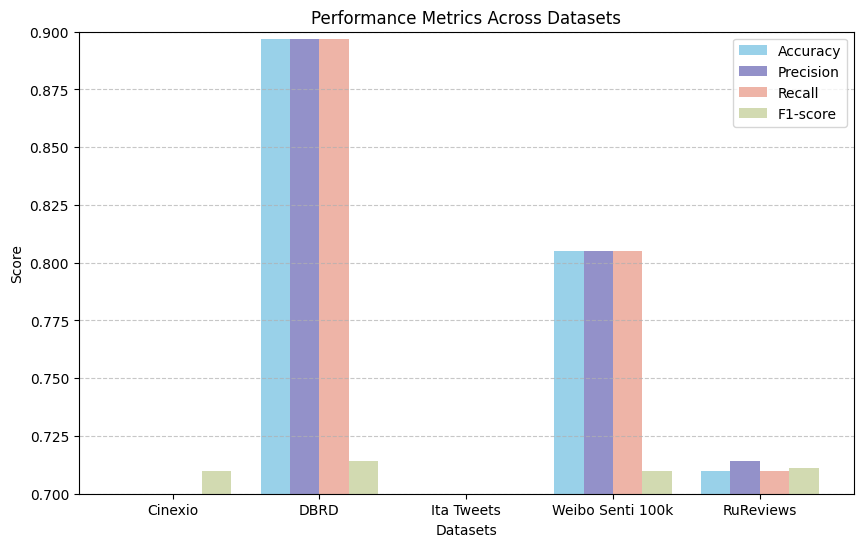

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample results (replace with your actual values)
datasets = ["Cinexio", "DBRD", "Ita Tweets", "Weibo Senti 100k", "RuReviews"]
accuracy = [0.122, 0.897, 0.0, 0.805, 0.710]
precision = [0.333, 0.897, 0.0, 0.805, 0.714]
recall = [0.04, 0.897, 0.0, 0.805, 0.710]
f1_score = [0.710, 0.714, 0.0, 0.710, 0.711]

# Set width of bars
bar_width = 0.2
index = np.arange(len(datasets))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='#99D1E9')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='#9391C9')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='#EEB4A7')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-score', color='#D2DAB1')

# Formatting
plt.xlabel("Datasets")
plt.ylabel("Score")
plt.title("Performance Metrics Across Datasets")
plt.xticks(index + 1.5 * bar_width, datasets)
plt.ylim(0.7, 0.9)  # Adjust based on range of scores
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [ ]:
def plot_confusion_mat(labels, preds):
    cm = confusion_matrix(labels, preds)

    # Define class labels (modify as needed)
    class_labels = ["Negative", "Neutral", "Positive"]  # Adjust based on dataset

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def get_predictions(model, dataset, device, last_checkpoint):
    model.eval()  # Set model to evaluation mode
    predictions, true_labels = [], []

    # Create DataLoader
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=4)

    # Loop through the DataLoader with tqdm progress bar
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Predicting", unit="batch"):  # tqdm adds a progress bar here
            inputs = {k: v.to(device) for k, v in batch.items() if k in ["input_ids", "attention_mask"]}
            labels = batch["labels"].to(device)

            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1)  # Get predicted class

            predictions.extend(preds.cpu().numpy())  # Move to CPU and store
            true_labels.extend(labels.cpu().numpy())  # Move to CPU and store

    return np.array(predictions), np.array(true_labels)

## Cinexio

Cinexio Movie Reviews Dataset is a Bulgarian sentiment
analysis dataset obtained by collecting movie reviews from the website Cinexio. The labels
were then retrieved automatically based on the users' ratings. The dataset is part of the
bgGLUE benchmark and can be downloaded at the following link: https://bgglue.github.io/tasks/task_info/cinexio/



### Load the dataset

In [ ]:
# Load the dataset splits (train, validation and test)

train_path_bg = "/content/SA_train_bg_shuffled_translated.csv"
val_path_bg = "/content/SA_val_bg_shuffled_translated.csv"
test_path_bg = "/content/SA_test_bg_shuffled_translated.csv"

train_bg, val_bg, test_bg = load_dataset_splits(train_path_bg, val_path_bg, test_path_bg)
train_bg.head()

,ID,Cinexio_URL,Comment,User_Rating,Date,Category,translated_text
0,6677,http://www.cinexio.com/sofia/movie/17769,Супер!,5.0,2014-11-16,2,Super!
1,8838,http://www.cinexio.com/sofia/movie/20350,Няма нищо общо с първата серия :/ плосък и про...,1.0,2014-04-12,0,Has nothing to do with the first series:/ flat...
2,2974,http://www.cinexio.com/sofia/movie/12367,Много ми хареса!Прекрасна любовна история!Филм...,4.5,2014-03-20,2,I really liked it! Wonderful love story! The m...
3,6452,http://www.cinexio.com/sofia/movie/17768,Шантав и смешен.,3.5,2015-02-27,1,Shanty and funny.
4,4830,http://www.cinexio.com/sofia/movie/15656,Почти съм сигурна че и тоалетната чиния беше п...,5.0,2015-08-02,2,I am almost sure that the toilet bowl was in f...


In [ ]:
# Remove from the dataset the translations that were not successful
train_bg, val_bg, test_bg = remove_failed_translations(train_bg, val_bg, test_bg)

Nan values found in train set:  0
Nan values found in validation set:  0
Nan values found in test set:  0


In [ ]:
# Drop unnecessary columns and rename label column to "labels"
cols_bg_drop = ["ID", "Cinexio_URL", "User_Rating", "Date"]
train_bg, val_bg, test_bg = drop_columns(train_bg, val_bg, test_bg, cols_bg_drop, "Category")
train_bg.head()

,Comment,translated_text,labels
0,Супер!,Super!,2
1,Няма нищо общо с първата серия :/ плосък и про...,Has nothing to do with the first series:/ flat...,0
2,Много ми хареса!Прекрасна любовна история!Филм...,I really liked it! Wonderful love story! The m...,2
3,Шантав и смешен.,Shanty and funny.,1
4,Почти съм сигурна че и тоалетната чиния беше п...,I am almost sure that the toilet bowl was in f...,2


### Preprocess the dataset

In [ ]:
# Compute the weighted loss function
classes_bg = np.array([0, 1, 2]) # Negative=0, Neutral=1, Positive=2
loss_bg = compute_class_weights(train_bg, classes_bg, device)

In [ ]:
# Clean the dataset
train_bg, val_bg, test_bg = preprocess_dataset(train_bg, val_bg, test_bg)
train_bg.head()

,Comment,translated_text,labels
0,Супер!,super,2
1,Няма нищо общо с първата серия :/ плосък и про...,nothing first series flat simple humor,0
2,Много ми хареса!Прекрасна любовна история!Филм...,really liked wonderful love story movie nice a...,2
3,Шантав и смешен.,shanty funny,1
4,Почти съм сигурна че и тоалетната чиния беше п...,almost sure toilet bowl front blue screen effe...,2


In [ ]:
# Tokenization
train_bg_encodings, val_bg_encodings, test_bg_encodings = tokenization(train_bg, val_bg, test_bg, "labels")

In [ ]:
# Creating the dataset
train_bg_dataset = SentimentDataset(train_bg_encodings, train_bg_encodings['labels'])
val_bg_dataset = SentimentDataset(val_bg_encodings, val_bg_encodings['labels'])
test_bg_dataset = SentimentDataset(test_bg_encodings, test_bg_encodings['labels'])

### Train the model

In [ ]:
model_bg = load_model(train_bg)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_bg = model_training(
                  train_dataset=train_bg_dataset,
                  val_dataset=val_bg_dataset,
                  tokenizer=tokenizer,
                  model=model_bg,
                  loss_fn=loss_bg
              )
trainer_bg, last_checkpoint_bg = training_bg.main()

No checkpoint found, starting from scratch.


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-4de65a1fcf1c>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


In [ ]:
# Resume training from the last checkpoint if it exists
trainer_bg.train(resume_from_checkpoint=last_checkpoint_bg)

<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.915400,0.886917,0.601221,0.529368,0.587182,0.523570
1000,0.753400,0.882970,0.702950,0.597503,0.622107,0.591098


<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=1476, training_loss=0.7438783309647061, metrics={'train_runtime': 269.0505, 'train_samples_per_second': 87.653, 'train_steps_per_second': 5.486, 'total_flos': 630195691356504.0, 'train_loss': 0.7438783309647061, 'epoch': 3.0})

In [ ]:
trainer_bg.evaluate()

<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.8829703330993652,
 'eval_accuracy': 0.7029501525940997,
 'eval_precision': 0.5975034013949371,
 'eval_recall': 0.622106541513164,
 'eval_f1': 0.5910975934835713,
 'eval_runtime': 1.4025,
 'eval_samples_per_second': 700.893,
 'eval_steps_per_second': 44.207,
 'epoch': 3.0}

In [ ]:
trainer_bg.evaluate(test_bg_dataset)

<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.8535502552986145,
 'eval_accuracy': 0.728382502543235,
 'eval_precision': 0.6137253544317104,
 'eval_recall': 0.6417745732465457,
 'eval_f1': 0.6162384164335805,
 'eval_runtime': 3.1974,
 'eval_samples_per_second': 307.439,
 'eval_steps_per_second': 19.391,
 'epoch': 3.0}

### Results

In [ ]:
# Checkpoint path
last_checkpoint_bg = "/content/checkpoints/checkpoint-1476"

preds_bg, labels_bg = get_predictions(model_bg, test_bg_dataset, device, last_checkpoint_bg)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Predicting:   0%|          | 0/62 [00:00<?, ?batch/s]<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-14-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_

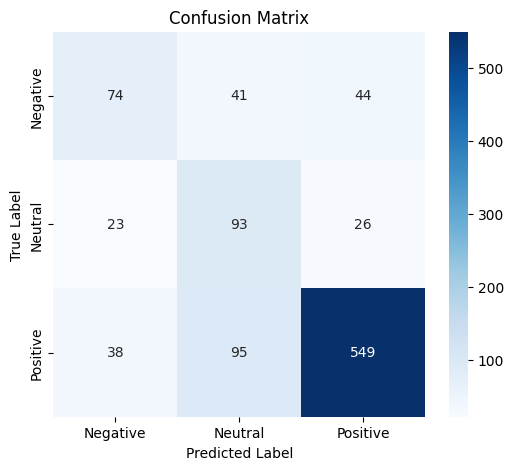

In [ ]:
plot_confusion_mat(labels_bg, preds_bg)

## DBRD

The Dutch Book Reviews Dataset (DBRD) contains over 110k
book reviews along with associated binary sentiment polarity labels. It is greatly influenced
by the Large Movie Review Dataset and intended as a benchmark for sentiment clas-
sification in Dutch. The dataset can be found at the following link: https://github.com/benjaminvdb/DBRD/tree/master?tab=readme-ov-file

### Load the dataset

In [ ]:
# Load the dataset splits (train, validation and test)

train_path_nl = "/content/DBRD_nl_train_translated.csv"
val_path_nl = "/content/DBRD_nl_val_translated.csv"
test_path_nl = "/content/DBRD_nl_test_translated.csv"

train_nl, val_nl, test_nl = load_dataset_splits(train_path_nl, val_path_nl, test_path_nl)
train_nl.head()

,text,label,translated_text
0,De Vlaamse thriller is in opmars. Onder andere...,1,The Flemish thriller is on the rise. Among oth...
1,"Geweldig boek weer van Simone van der vlught, ...",1,"Great book again by Simone van der vluchtht, e..."
2,"Dode mannen moorden niet, een boek van Roos Bo...",1,"Dead Men Don't Kill, a book by Roos Boum that ..."
3,"Wat zwaar boek, langdradigitale en traag verha...",0,"What a heavy book, long-winded and slow story...."
4,Om Maria Norberg heen ligt alles en iedereen d...,1,"Around Maria Norberg, everything and everyone ..."


In [ ]:
# Remove from the dataset the translations that were not successful
train_nl, val_nl, test_nl = remove_failed_translations(train_nl, val_nl, test_nl)

Nan values found in train set:  5
Nan values found in validation set:  4
Nan values found in test set:  0


In [ ]:
# Rename label column to "labels"
train_nl, val_nl, test_nl = drop_columns(train_nl, val_nl, test_nl, None, "label")
train_nl.head()

,text,translated_text,labels
0,De Vlaamse thriller is in opmars. Onder andere...,The Flemish thriller is on the rise. Among oth...,1
1,"Geweldig boek weer van Simone van der vlught, ...","Great book again by Simone van der vluchtht, e...",1
2,"Dode mannen moorden niet, een boek van Roos Bo...","Dead Men Don't Kill, a book by Roos Boum that ...",1
3,"Wat zwaar boek, langdradigitale en traag verha...","What a heavy book, long-winded and slow story....",0
4,Om Maria Norberg heen ligt alles en iedereen d...,"Around Maria Norberg, everything and everyone ...",1


### Preprocess the dataset

In [ ]:
# Clean the  dataset
train_nl, val_nl, test_nl = preprocess_dataset(train_nl, val_nl, test_nl)
train_nl.head()

<ipython-input-10-c906c72a2903>:15: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
<ipython-input-10-c906c72a2903>:15: MarkupResemblesLocatorWarni

,text,translated_text,labels
0,De Vlaamse thriller is in opmars. Onder andere...,flemish thriller rise among others flemish pie...,1
1,"Geweldig boek weer van Simone van der vlught, ...",great book simone van der vluchtht enjoyed sto...,1
2,"Dode mannen moorden niet, een boek van Roos Bo...",dead men kill book roos boum recently finished...,1
3,"Wat zwaar boek, langdradigitale en traag verha...",heavy book long winded slow story stopped read...,0
4,Om Maria Norberg heen ligt alles en iedereen d...,around maria norberg everything everyone lie d...,1


In [ ]:
# Tokenization
train_nl_encodings, val_nl_encodings, test_nl_encodings = tokenization(train_nl, val_nl, test_nl, "labels")

In [ ]:
# Creating the dataset
train_nl_dataset = SentimentDataset(train_nl_encodings, train_nl_encodings['labels'])
val_nl_dataset = SentimentDataset(val_nl_encodings, val_nl_encodings['labels'])
test_nl_dataset = SentimentDataset(test_nl_encodings, test_nl_encodings['labels'])

### Train the model

In [ ]:
model_nl = load_model(train_nl)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_nl = model_training(
                  train_dataset=train_nl_dataset,
                  val_dataset=val_nl_dataset,
                  tokenizer=tokenizer,
                  model=model_nl,
                  loss_fn=None
              )
trainer_nl, last_checkpoint_nl = training_nl.main()

No checkpoint found, starting from scratch.


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-d44f6defbdf2>:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Resume training from the last checkpoint if it exists
trainer_nl.train(resume_from_checkpoint=last_checkpoint_nl)

<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.427400,0.334931,0.898747,0.903659,0.899144,0.898499
1000,0.324900,0.178608,0.940400,0.941400,0.940238,0.940348
1500,0.213200,0.138779,0.953607,0.954126,0.953737,0.953600
2000,0.180000,0.104026,0.969523,0.969521,0.969521,0.969521
2500,0.121400,0.092358,0.977988,0.977990,0.978014,0.977988
3000,0.083000,0.093033,0.978666,0.978785,0.978735,0.978666


<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a 

TrainOutput(global_step=3162, training_loss=0.21740973621587978, metrics={'train_runtime': 5228.2761, 'train_samples_per_second': 9.676, 'train_steps_per_second': 0.605, 'total_flos': 1.331052517960704e+16, 'train_loss': 0.21740973621587978, 'epoch': 3.0})

In [ ]:
trainer_nl.evaluate()

<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.0841522142291069,
 'eval_accuracy': 0.9810362343379614,
 'eval_precision': 0.9810667083792814,
 'eval_recall': 0.9810786250276383,
 'eval_f1': 0.9810362147657163,
 'eval_runtime': 88.2815,
 'eval_samples_per_second': 33.45,
 'eval_steps_per_second': 2.096,
 'epoch': 3.0}

In [ ]:
trainer_nl.evaluate(test_nl_dataset)

<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.46738243103027344,
 'eval_accuracy': 0.9055755395683454,
 'eval_precision': 0.9058709466480637,
 'eval_recall': 0.9055755395683454,
 'eval_f1': 0.9055583550847314,
 'eval_runtime': 66.9327,
 'eval_samples_per_second': 33.227,
 'eval_steps_per_second': 2.077,
 'epoch': 3.0}

### Results

In [ ]:
# Checkpoint path
last_checkpoint_nl = "/content/drive/MyDrive/Leiden Uni/Thesis/checkpoints/checkpoint-3162"

preds_nl, labels_nl = get_predictions(model_nl, test_nl_dataset, device, last_checkpoint_nl)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Predicting:   0%|          | 0/139 [00:00<?, ?batch/s]<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad

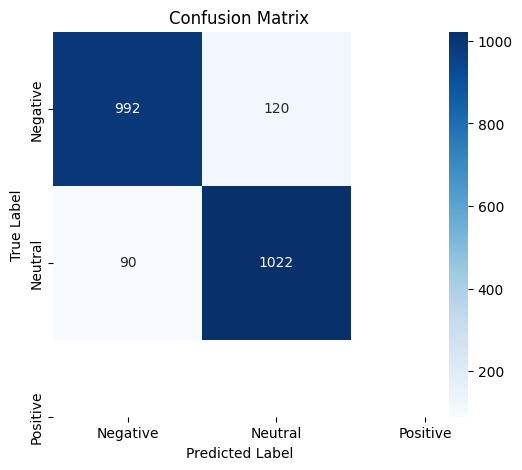

In [ ]:
plot_confusion_mat(labels_nl, preds_nl)

## Ita Tweets

The dataset was created by collecting Tweets
using the Twitter API between May and September 2018, with the sentiment being gener
ated with AWS Comprehend API. It is available at the following link, under the file name
betsentiment-IT-tweets-sentiment-players.zip: https://github.com/charlesmalafosse/open-dataset-for-sentiment-analysis/tree/master

### Load the dataset

In [ ]:
# Load the dataset splits (train, validation and test)

train_path_it = "/content/ita_tweets_train_final.csv"
val_path_it = "/content/ita_tweets_it_val_translated.csv"
test_path_it = "/content/ita_tweets_it_test_translated.csv"

train_it, val_it, test_it = load_dataset_splits(train_path_it, val_path_it, test_path_it)
train_it.head()

,sentiment,translated_text
0,NEUTRAL,@RealPiccinini @MarioMandzukic9 Sandro I appre...
1,NEUTRAL,@RollingStoneita @Cristiano @juventusfc What t...
2,NEUTRAL,@realvarrale @jimmyjimmy88 @KMbappe @G_Higuain...
3,NEUTRAL,@lyann1982 @dimpayet17 @omdansle @CoachGracias...
4,NEUTRAL,@xmx_sava @realvarrale @sscnapoli @kkoubibaly2...


In [ ]:
# Remove from the dataset the translations that were not successful
train_it, val_it, test_it = remove_failed_translations(train_it, val_it, test_it)

Nan values found in train set:  2655
Nan values found in validation set:  9
Nan values found in test set:  1


In [ ]:
# Rename label column to "labels"
train_it, val_it, test_it = drop_columns(train_it, val_it, test_it, None, "sentiment")
train_it.head()

,translated_text,labels
0,@RealPiccinini @MarioMandzukic9 Sandro I appre...,NEUTRAL
1,@RollingStoneita @Cristiano @juventusfc What t...,NEUTRAL
2,@realvarrale @jimmyjimmy88 @KMbappe @G_Higuain...,NEUTRAL
3,@lyann1982 @dimpayet17 @omdansle @CoachGracias...,NEUTRAL
4,@xmx_sava @realvarrale @sscnapoli @kkoubibaly2...,NEUTRAL


### Preprocess the dataset

In [ ]:
# Mapping dictionary
sentiment_map_it = {'POSITIVE': 0, 'NEGATIVE': 1, 'NEUTRAL': 2, 'MIXED': 3}

# Replace sentiment values with numbers
train_it['labels'] = train_it['labels'].map(sentiment_map_it)
val_it['labels'] = val_it['labels'].map(sentiment_map_it)
test_it['labels'] = test_it['labels'].map(sentiment_map_it)
train_it.head()

,translated_text,labels
0,@RealPiccinini @MarioMandzukic9 Sandro I appre...,2
1,@RollingStoneita @Cristiano @juventusfc What t...,2
2,@realvarrale @jimmyjimmy88 @KMbappe @G_Higuain...,2
3,@lyann1982 @dimpayet17 @omdansle @CoachGracias...,2
4,@xmx_sava @realvarrale @sscnapoli @kkoubibaly2...,2


In [ ]:
unique_val = val_it["labels"].unique()
unique_val

array([ 2.,  0.,  1., nan,  3.])

In [ ]:
val_it = val_it.dropna(subset=['labels'])
val_it['labels'] = val_it['labels'].astype(int)
print("Unique labels in validation set:", val_it['labels'].unique())

Unique labels in validation set: [2 0 1 3]


<ipython-input-25-201f5173f0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_it['labels'] = val_it['labels'].astype(int)


In [ ]:
# Compute the weighted loss function
classes_it = np.array([0, 1, 2, 3]) # Positive=0, Negative=1, Neutral=2, Mixed=3
loss_it = compute_class_weights(train_it, classes_it, device)

In [ ]:
# Clean the dataset
train_it, val_it, test_it = preprocess_dataset(train_it, val_it, test_it)
train_it.head()

<ipython-input-10-26d7e5615a17>:15: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


,translated_text,labels
0,sandro appreciate suspicion already started ce...,2
1,fuck dissoccate never football mafia,2
2,bit like insigne worst italian national time a...,2
3,olympico le market,2
4,prejudice famous terrones,2


In [ ]:
# Tokenization
train_it_encodings, val_it_encodings, test_it_encodings = tokenization(train_it, val_it, test_it, "labels")

In [ ]:
# Creating the dataset
train_it_dataset = SentimentDataset(train_it_encodings, train_it_encodings['labels'])
val_it_dataset = SentimentDataset(val_it_encodings, val_it_encodings['labels'])
test_it_dataset = SentimentDataset(test_it_encodings, test_it_encodings['labels'])

### Train the model

In [ ]:
model_it = load_model(train_it)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_it = model_training(
                  train_dataset=train_it_dataset,
                  val_dataset=val_it_dataset,
                  tokenizer=tokenizer,
                  model=model_it,
                  loss_fn=loss_it
              )
trainer_it, last_checkpoint_it = training_it.main()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Resuming training from checkpoint: /content/drive/MyDrive/Leiden Uni/Thesis/checkpoints/checkpoint-17500


<ipython-input-15-7502dd44e21a>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


In [ ]:
# Resume training from the last checkpoint if it exists
trainer_it.train(resume_from_checkpoint=last_checkpoint_it)

/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:3441: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(checkpoint, OPTIMIZER_NAME), map_

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
18000,0.688400,0.950785,0.766836,0.419943,0.523034,0.450434
18500,0.650100,1.026335,0.786990,0.431349,0.515150,0.459972
19000,0.681200,1.073596,0.775646,0.428003,0.511918,0.454601
19500,0.697500,0.969144,0.767379,0.420902,0.518867,0.450371
20000,0.622800,0.991084,0.760982,0.437680,0.536318,0.461497
20500,0.642300,0.975835,0.783128,0.444202,0.526750,0.469545
21000,0.688100,0.975311,0.784637,0.445290,0.526302,0.470116
21500,0.657300,0.997889,0.789645,0.446406,0.517319,0.468557
22000,0.619500,1.010809,0.778421,0.437367,0.522802,0.463299


<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-13-8c6f1d5dd71d>:7: UserWarning: To copy construct

In [ ]:
trainer_it.evaluate()

In [ ]:
trainer_it.evaluate(test_it_dataset)

## Weibo Senti 100k

### Load the dataset

In [ ]:
# Load the dataset splits (train, validation and test)

train_path_ch = "/content/weibo_ch_train_translated.csv"
val_path_ch = "/content/weibo_ch_val.csv_translated.csv"
test_path_ch = "/content/weibo_ch_test_translated.csv"

train_ch, val_ch, test_ch = load_dataset_splits(train_path_ch, val_path_ch, test_path_ch)
train_ch.head()

,label,review,translated_text
0,1,[赞]//@京M银狐: 等待时机[哈哈]//@准备微笑的海燕: 太美了太美了！[花心][花心...,[Zanky]/@KingM Silver Fox: Waiting for the tim...
1,1,最经典应该是“荷兰银行支票”，[哈哈][哈哈] //@梁sisi:HOLAND MOON[偷...,"The classic should be a Dutch bank cheque, [Ha..."
2,1,基础不牢，通航发展滞后。 //@KCD777://@张起淮:堵的貌似强硬，实是虚弱[哈哈] ...,"The base is weak, and navigation lags behind. ..."
3,0,回复@黎筱婷子:我们在东北种大豆，使用中国本产非转基因大豆品种，?成豆浆粉送瑞士SGS非转基...,@LiXinziko: We grow soy beans in the northeast...
4,1,[哈哈] //@泉州女一号:[围观]完全能理解！如果彩排时?现过类似的情况估计直播时就会加以...,[Haha] / @Quanzhou Woman I: [Crowd] fully unde...


In [ ]:
# Remove from the dataset the translations that were not successful
train_ch, val_ch, test_ch = remove_failed_translations(train_ch, val_ch, test_ch)

Nan values found in train set:  52
Nan values found in validation set:  5
Nan values found in test set:  4


In [ ]:
# Rename label column to "labels"
train_ch, val_ch, test_ch = drop_columns(train_ch, val_ch, test_ch, None, "label")
train_ch.head()

,review,translated_text,labels
0,[赞]//@京M银狐: 等待时机[哈哈]//@准备微笑的海燕: 太美了太美了！[花心][花心...,[Zanky]/@KingM Silver Fox: Waiting for the tim...,1
1,最经典应该是“荷兰银行支票”，[哈哈][哈哈] //@梁sisi:HOLAND MOON[偷...,"The classic should be a Dutch bank cheque, [Ha...",1
2,基础不牢，通航发展滞后。 //@KCD777://@张起淮:堵的貌似强硬，实是虚弱[哈哈] ...,"The base is weak, and navigation lags behind. ...",1
3,回复@黎筱婷子:我们在东北种大豆，使用中国本产非转基因大豆品种，?成豆浆粉送瑞士SGS非转基...,@LiXinziko: We grow soy beans in the northeast...,0
4,[哈哈] //@泉州女一号:[围观]完全能理解！如果彩排时?现过类似的情况估计直播时就会加以...,[Haha] / @Quanzhou Woman I: [Crowd] fully unde...,1


### Preprocess the dataset

In [ ]:
# Clean the dataset
train_ch, val_ch, test_ch = preprocess_dataset(train_ch, val_ch, test_ch)
train_ch.head()

In [ ]:
# Tokenization
train_ch_encodings, val_ch_encodings, test_ch_encodings = tokenization(train_ch, val_ch, test_ch, "labels")

In [ ]:
# Creating the dataset
train_ch_dataset = SentimentDataset(train_ch_encodings, train_ch_encodings['label'])
val_ch_dataset = SentimentDataset(val_ch_encodings, val_ch_encodings['label'])
test_ch_dataset = SentimentDataset(test_ch_encodings, test_ch_encodings['label'])

### Train the model

In [ ]:
model_ch = load_model(train_ch)

In [ ]:
training_ch = model_training(
                  train_dataset=train_ch_dataset,
                  val_dataset=val_ch_dataset,
                  tokenizer=tokenizer,
                  model=model_ch,
                  loss_fn=None
              )
trainer_ch, last_checkpoint_ch = training_ch.main()

In [ ]:
# Resume training from the last checkpoint if it exists
trainer_ch.train(resume_from_checkpoint=last_checkpoint_ch)

In [ ]:
trainer_ch.evaluate()

In [ ]:
trainer_ch.evaluate(test_ch_dataset)

## RuReviews

This is a sentiment analysis dataset of product reviews
in Russian, which was developed by collecting reviews on top-ranked goods form the major e-
commerce site in Russian, where user-ranked scores were used as class labels on a 5-point scale.
In particular the dataset is characterized by reviews from only one product category, namely
"Women's Clothes and Accessories". The dataset can be found at the following link: https://github.com/sismetanin/rureviews/blob/master/women-clothing-accessories.3-class.balanced.csv

### Load the dataset

In [ ]:
# Load the dataset splits (train, validation and test)

train_path_ru = "/content/rureviews_ru_train_translated.csv"
val_path_ru = "/content/rureviews_val_translated.csv"
test_path_ru = "/content/rureviews_test_translated.csv"

train_ru, val_ru, test_ru = load_dataset_splits(train_path_ru, val_path_ru, test_path_ru)
train_ru.head()

,review,sentiment,translated_text
0,пришло быстро. по размеру подошло (90-67-94). ...,neautral,"It came quickly. The size was 90-67-94, but on..."
1,Очень долгая доставка !!!!,negative,Very long delivery!!!!!!
2,На картинке в заказе рубашка с длинными рукава...,neautral,"In the picture in the book, a shirt with long ..."
3,Деньги вернули,neautral,The money's back.
4,"Майка на меня увы не села. (лямки короткие, м...",neautral,Myka hasn't landed on me.


In [ ]:
# Remove from the dataset the translations that were not successful
train_ru, val_ru, test_ru = remove_failed_translations(train_ru, val_ru, test_ru)

Nan values found in train set:  1
Nan values found in validation set:  2
Nan values found in test set:  0


In [ ]:
# Rename label column to "labels"
train_ru, val_ru, test_ru = drop_columns(train_ru, val_ru, test_ru, None, "sentiment")
train_ru.head()

,review,translated_text,labels
0,пришло быстро. по размеру подошло (90-67-94). ...,"It came quickly. The size was 90-67-94, but on...",neautral
1,Очень долгая доставка !!!!,Very long delivery!!!!!!,negative
2,На картинке в заказе рубашка с длинными рукава...,"In the picture in the book, a shirt with long ...",neautral
3,Деньги вернули,The money's back.,neautral
4,"Майка на меня увы не села. (лямки короткие, м...",Myka hasn't landed on me.,neautral


### Preprocess the dataset

In [ ]:
# Mapping dictionary
sentiment_map_ru = {'positive': 0, 'negative': 1, 'neautral': 2}

# Replace sentiment values with numbers
train_ru['labels'] = train_ru['labels'].map(sentiment_map)
val_ru['labels'] = val_ru['labels'].map(sentiment_map)
test_ru['labels'] = test_ru['labels'].map(sentiment_map)
train_ru.head()

In [ ]:
# Preprocess dataset
train_ru, val_ru, test_ru = preprocess_dataset(train_ru, val_ru, test_ru)
train_ru.head()

In [ ]:
# Tokenization
train_ru_encodings, val_ru_encodings, test_ru_encodings = tokenization(train_ru, val_ru, test_ru, "labels")

In [ ]:
# Creating the dataset
train_ru_dataset = SentimentDataset(train_ru_encodings, train_ru_encodings['labels'])
val_ru_dataset = SentimentDataset(val_ru_encodings, val_ru_encodings['labels'])
test_ru_dataset = SentimentDataset(test_ru_encodings, test_ru_encodings['labels'])

### Train the model

In [ ]:
model_ru = load_model(train_ru)

In [ ]:
training_ru = model_training(
                  train_dataset=train_ru_dataset,
                  val_dataset=val_ru_dataset,
                  tokenizer=tokenizer,
                  model=model_ru,
                  loss_fn=None
              )
trainer_ru, last_checkpoint_ru = training_ru.main()

In [ ]:
trainer_ru.evaluate()

In [ ]:
trainer_ru.evaluate(test_ru_dataset)